In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
tailoring_df=pd.read_csv('tailoring.csv')

In [3]:
tailoring_df=tailoring_df.set_index('datetime')

In [4]:
grouped_ta_df=tailoring_df.groupby(['datetime','item.id']).min()

In [5]:
grouped_ta_df.head(30)

id  quantity  unit_price time_left  \
datetime            item.id                                               
2023-12-22 18:41:00 190322   1876593102         1       33.01      LONG   
                    190324   1876653359         1      350.24      LONG   
                    190326   1876692246         1       17.79      LONG   
                    190327   1877142136         1      175.57      LONG   
                    190328   1876708881         1       15.63      LONG   
                    190329   1876629949         1      154.98      LONG   
                    192095   1879155795         1        1.70      LONG   
                    193922   1876598529         1        0.93      LONG   
                    193926   1878482640         1       41.00      LONG   
                    193929   1879761462         1       25.00      LONG   
                    193935   1879765024         1      890.01      LONG   
                    193938   1878826400         1      866.25      LONG   
                    193944   1880924366         1      128.54      LONG   
                    194124   1876837454         1       11.95      LONG   
                    201405   1876834253         1       49.00      LONG   
                    208212   1876628276         1      193.03      LONG   
                    210671   1879165395         1      799.00      LONG   
2023-12-22 19:41:00 190322   1876797413         1       33.00      LONG   
                    190324   1876830964         1      350.90      LONG   
                    190326   1876826023         1       16.69      LONG   
                    190327   1877142136         1      169.00      LONG   
                    190328   1876825512         1       15.14      LONG   
                    190329   1876856129         1      154.93      LONG   
                    192095   1879155795         1        1.70      LONG   
                    193922   1876784690         1        1.03      LONG   
                    193926   1878482640         1       41.00      LONG   
                    193929   1879761462         1       25.00      LONG   
                    193935   1879765024         1      890.01      LONG   
                    193938   1878826400         1      866.25      LONG   
                    193944   1880924366         1      128.54      LONG   

                                            item.name   item.class  
datetime            item.id                                         
2023-12-22 18:41:00 190322              Rousing Order  Trade Goods  
                    190324             Awakened Order  Trade Goods  
                    190326                Rousing Air  Trade Goods  
                    190327               Awakened Air  Trade Goods  
                    190328              Rousing Frost  Trade Goods  
                    190329             Awakened Frost  Trade Goods  
                    192095      Spool of Wilderthread  Trade Goods  
                    193922                Wildercloth  Trade Goods  
                    193926           Wildercloth Bolt  Trade Goods  
                    193929   Vibrant Wildercloth Bolt  Trade Goods  
                    193935           Chronocloth Bolt  Trade Goods  
                    193938            Azureweave Bolt  Trade Goods  
                    193944         Blue Silken Lining  Trade Goods  
                    194124              Vibrant Shard  Trade Goods  
                    201405        Tuft of Primal Wool  Trade Goods  
                    208212           Dreaming Essence  Trade Goods  
                    210671             Verdant Tether  Trade Goods  
2023-12-22 19:41:00 190322              Rousing Order  Trade Goods  
                    190324             Awakened Order  Trade Goods  
                    190326                Rousing Air  Trade Goods  
                    190327               Awakened Air  Trade Goods  
                    190328              Rousing F

In [6]:
reset_ta_df=grouped_ta_df.reset_index()
reset_ta_df=reset_ta_df.set_index('datetime')
reset_ta_df.head()

item.id          id  quantity  unit_price time_left  \
datetime                                                                   
2023-12-22 18:41:00   190322  1876593102         1       33.01      LONG   
2023-12-22 18:41:00   190324  1876653359         1      350.24      LONG   
2023-12-22 18:41:00   190326  1876692246         1       17.79      LONG   
2023-12-22 18:41:00   190327  1877142136         1      175.57      LONG   
2023-12-22 18:41:00   190328  1876708881         1       15.63      LONG   

                          item.name   item.class  
datetime                                          
2023-12-22 18:41:00   Rousing Order  Trade Goods  
2023-12-22 18:41:00  Awakened Order  Trade Goods  
2023-12-22 18:41:00     Rousing Air  Trade Goods  
2023-12-22 18:41:00    Awakened Air  Trade Goods  
2023-12-22 18:41:00   Rousing Frost  Trade Goods

In [7]:
blue_silk_list=reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==193944]
blue_silk_material_price=(reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==201405]*1+
                                     reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==192095]*5+
                                     reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==193938]*1)
blue_silk_df=pd.DataFrame(blue_silk_list)
blue_silk_df['material_price']=blue_silk_material_price
blue_silk_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      128.54          923.75
2023-12-22 19:41:00      128.54          924.75
2023-12-22 20:41:00      128.54          924.50
2023-12-22 21:41:00      128.54          924.80
2023-12-22 22:41:00      128.54          925.53
...                         ...             ...
2024-01-03 11:41:00      115.65          749.49
2024-01-03 12:41:00      115.65          749.49
2024-01-03 13:41:00      125.65          749.49
2024-01-03 14:41:00      125.65          748.50
2024-01-03 15:41:00      125.64          748.50

[285 rows x 2 columns]

In [8]:
verdant_tether_list=reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==210671]
verdant_tether_material_price=(reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==201405]*1+
                                     reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==208212]*3+
                                     reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==192095]*25+
                                     reset_ta_df['unit_price'].loc[reset_ta_df['item.id']==193929]*5)
verdant_tether_df=pd.DataFrame(verdant_tether_list)
verdant_tether_df['material_price']=verdant_tether_material_price
verdant_tether_df

unit_price  material_price
datetime                                       
2023-12-22 18:41:00      799.00          795.59
2023-12-22 19:41:00      799.00          769.50
2023-12-22 20:41:00      799.00          788.35
2023-12-22 21:41:00      799.00          743.55
2023-12-22 22:41:00      799.00          747.69
...                         ...             ...
2024-01-03 11:41:00      545.00          739.49
2024-01-03 12:41:00      545.00          557.09
2024-01-03 13:41:00      544.99          680.99
2024-01-03 14:41:00      544.99          554.41
2024-01-03 15:41:00      544.98          707.44

[285 rows x 2 columns]

In [9]:
blue_silk_df['potential_profit']=(blue_silk_df['unit_price']-blue_silk_df['material_price'])
blue_silk_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      128.54          923.75           -795.21
2023-12-22 19:41:00      128.54          924.75           -796.21
2023-12-22 20:41:00      128.54          924.50           -795.96
2023-12-22 21:41:00      128.54          924.80           -796.26
2023-12-22 22:41:00      128.54          925.53           -796.99
...                         ...             ...               ...
2024-01-03 11:41:00      115.65          749.49           -633.84
2024-01-03 12:41:00      115.65          749.49           -633.84
2024-01-03 13:41:00      125.65          749.49           -623.84
2024-01-03 14:41:00      125.65          748.50           -622.85
2024-01-03 15:41:00      125.64          748.50           -622.86

[285 rows x 3 columns]

In [10]:
verdant_tether_df['potential_profit']=(verdant_tether_df['unit_price']-verdant_tether_df['material_price'])
verdant_tether_df

unit_price  material_price  potential_profit
datetime                                                         
2023-12-22 18:41:00      799.00          795.59              3.41
2023-12-22 19:41:00      799.00          769.50             29.50
2023-12-22 20:41:00      799.00          788.35             10.65
2023-12-22 21:41:00      799.00          743.55             55.45
2023-12-22 22:41:00      799.00          747.69             51.31
...                         ...             ...               ...
2024-01-03 11:41:00      545.00          739.49           -194.49
2024-01-03 12:41:00      545.00          557.09            -12.09
2024-01-03 13:41:00      544.99          680.99           -136.00
2024-01-03 14:41:00      544.99          554.41             -9.42
2024-01-03 15:41:00      544.98          707.44           -162.46

[285 rows x 3 columns]

<Axes: xlabel='datetime'>

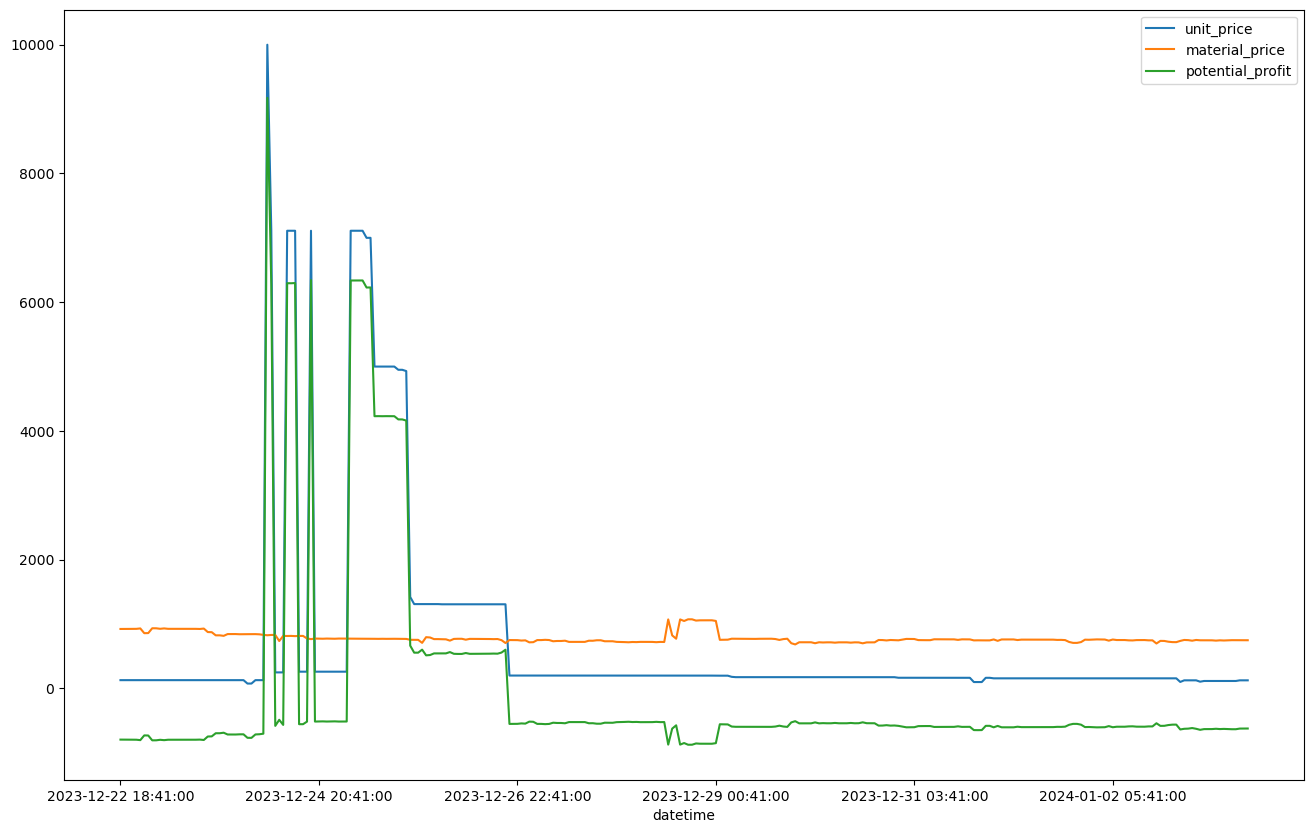

In [11]:
blue_silk_df.plot(figsize=(16,10))

<Axes: xlabel='datetime'>

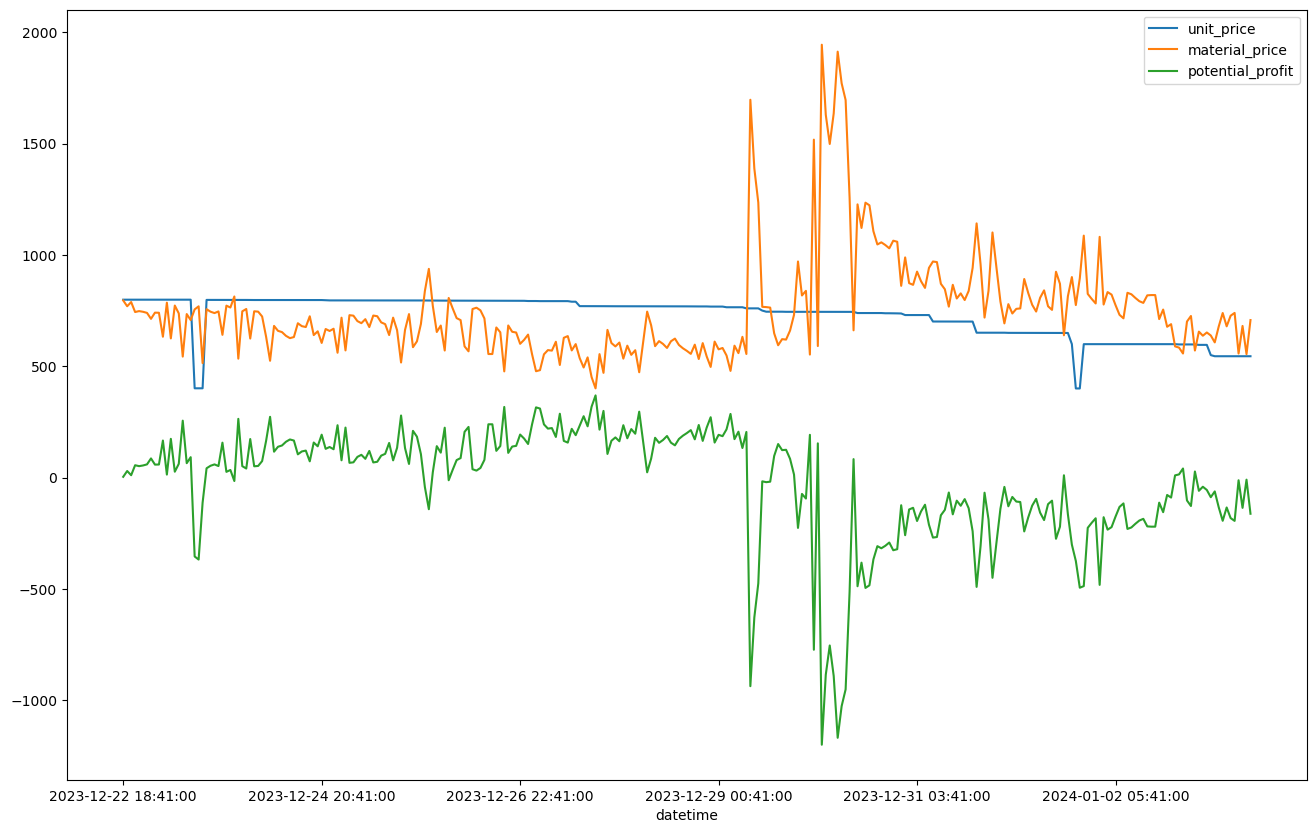

In [12]:
verdant_tether_df.plot(figsize=(16,10))

In [14]:
tailoring_profit_dict={"blue_silk":blue_silk_df['potential_profit'].mean(),
                      "verdant_tether":verdant_tether_df['potential_profit'].mean()}
tailoring_profit_dict

{'blue_silk': -58.69417543859648, 'verdant_tether': -25.672736842105273}

In [15]:
verdant_tether_df.to_csv('C:/Users/gc20r/Desktop/python_challenges/Action_House/Auction_House/verdant_tether.csv')